### This program uses Artificial recurrent neural network LSTM to predict closing stock price

In [4]:
#importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
ticker = 'AAPL'

In [6]:
#getting the stock quote
df = web.DataReader(ticker,data_source='yahoo',start='2012-01-01',end='2022-10-24')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540047
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747406
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880666
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860235
...,...,...,...,...,...,...
2022-10-18,146.699997,140.610001,145.490005,143.750000,99136600.0,143.750000
2022-10-19,144.949997,141.500000,141.690002,143.860001,61758300.0,143.860001
2022-10-20,145.889999,142.649994,143.020004,143.389999,64522000.0,143.389999


In [7]:
#Getting the number of rows and columns in the dataset
df.shape

(2721, 6)

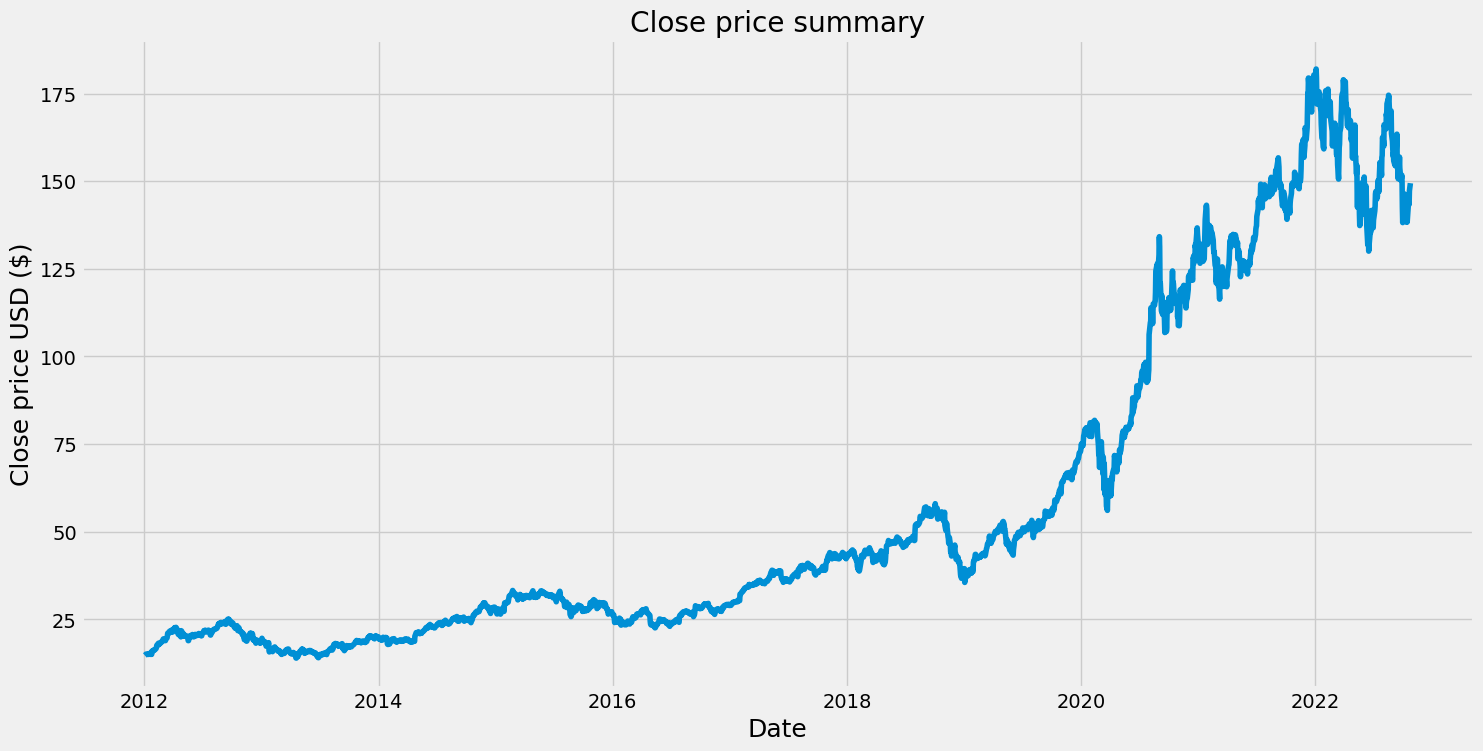

In [8]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price summary')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [9]:
#create a new dataframe with just the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#getting the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2177

In [10]:
#Scaling the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.77020456],
       [0.79329124],
       [0.80626256]])

In [11]:
#Create the training dataset
#create a scaled dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into X_train and y_train datasets
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(X_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]



In [12]:
train_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.66588324],
       [0.65973968],
       [0.66984011]])

In [13]:
#Convert the X_train and y_train to numpy array
X_train,y_train = np.array(X_train),np.array(y_train)

In [14]:
X_train.shape

(2117, 60)

In [15]:
#reshape the data as the LSTM expects the data to be in 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2117, 60, 1)

### Building the LSTM model

In [16]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2022-10-24 14:27:30.495176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
model.fit(X_train,y_train,batch_size=1,epochs=4)

Epoch 1/4
2117/2117 [==============================] - 29s 13ms/step - loss: 4.6450e-04
Epoch 2/4
2117/2117 [==============================] - 27s 13ms/step - loss: 2.2136e-04
Epoch 3/4
2117/2117 [==============================] - 27s 13ms/step - loss: 1.5107e-04
Epoch 4/4
2117/2117 [==============================] - 28s 13ms/step - loss: 1.2931e-04


In [19]:
#Creating the testing dataset
#Create a new array containing scaled value from index 2117 to 2721
test_data = scaled_data[training_data_len-60:,:]
#create the dataset X_test,y_test
X_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [20]:
#CONVERT THE DATA INTO A np.array
X_test = np.array(X_test)

In [21]:
X_test.shape

(544, 60)

In [22]:
#Reshaping the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(544, 60, 1)

In [23]:
#Getting the model predicted price value
predictions = model.predict(X_test)

17/17 [==============================] - 1s 10ms/step


In [24]:
predictions=scalar.inverse_transform(predictions)

In [25]:
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.159540793474983

/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_7649/2628329274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


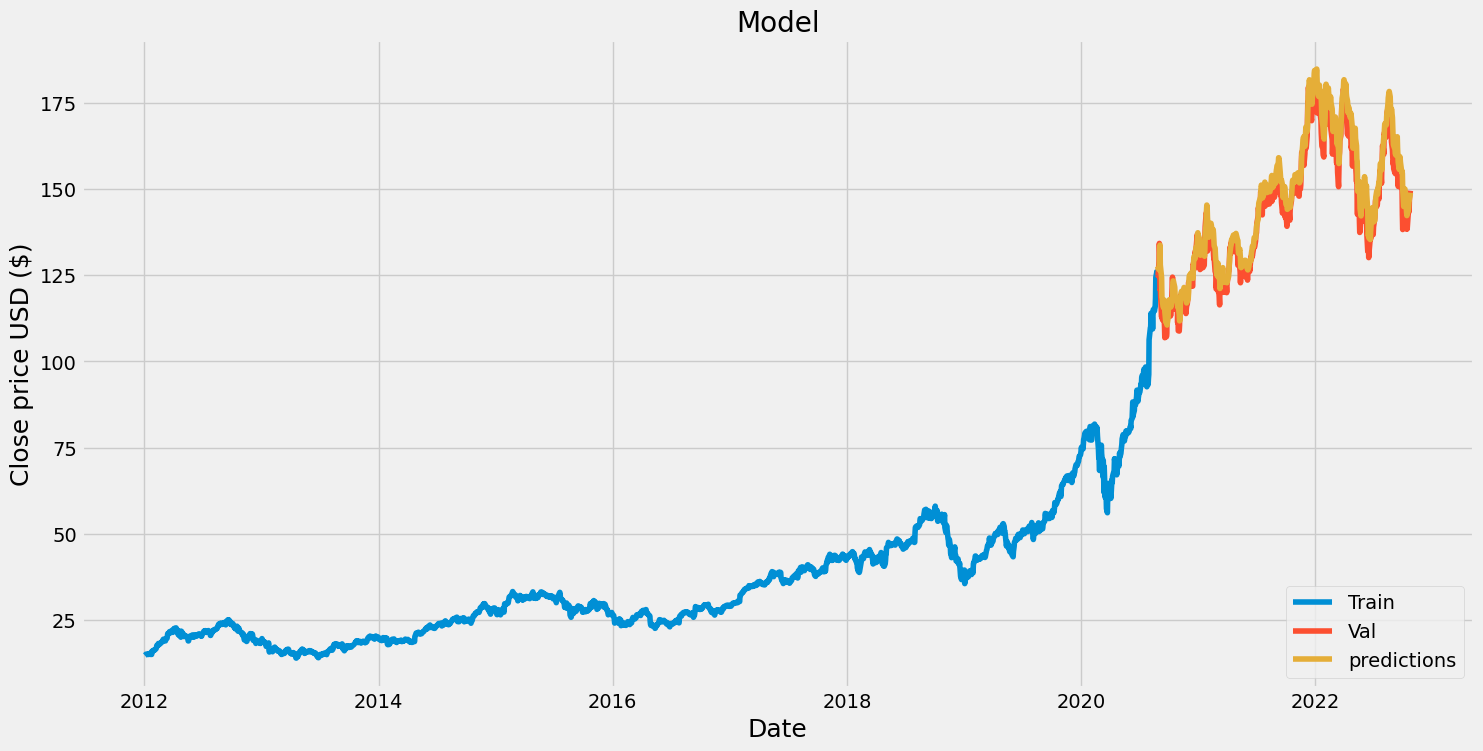

In [26]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [27]:
#Show the valid and predicted price
valid

,Close,predictions
Date,,
2020-08-27,125.010002,127.476288
2020-08-28,124.807503,127.039658
2020-08-31,129.039993,126.533592
2020-09-01,134.179993,128.598083
2020-09-02,131.399994,132.816147
...,...,...
2022-10-18,143.750000,144.646866
2022-10-19,143.860001,146.243927
2022-10-20,143.389999,147.044769


In [28]:
#Get the quote 
Stock_quote = web.DataReader(ticker,data_source='yahoo',start='2020-01-01',end='2022-10-24')
#Create a new dataframe
new_df = Stock_quote.filter(['Close'])
#get the last 60 day closing values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data to 3D
X_test == np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 484ms/step
[[151.21538]]


In [29]:
from datetime import date

today = date.today()
print("Today's date:", today)


Today's date: 2022-10-24


In [30]:
Stock_quote2 = web.DataReader(ticker,data_source='yahoo',start=today,end=today)
print(Stock_quote2['Close'])

Date
2022-10-24    149.449997
Name: Close, dtype: float64


In [31]:
Price_difference = pred_price[0]-Stock_quote2['Close']
print('Based on this analysis, there is a price difference of ${:.2f} from the predicted cost to the actual cost.'.format(Price_difference[0]))

Based on this analysis, there is a price difference of $1.77 from the predicted cost to the actual cost.
